TRANSMISSION LINES




By EJ-5903 (z5425252) 

In [1]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
transmissionlines_data = pd.read_csv("ElectricityTransmissionLines_v2.csv")
transmissionlines_visual = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
transmissionlines_visual.set_crs(epsg=5234, inplace=True, allow_override=True) 
popdensity = gp.GeoDataFrame.from_file('PopWghtdDensityChange2011_14.shp')
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
print("done")

done


In [6]:
  transmissionlines_data.head()

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,CAPACITYKV,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,SHAPE_Length
0,1,Transmission Line,A network of wires and insulators used to conn...,Overhead,1,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.010167
1,2,Transmission Line,A network of wires and insulators used to conn...,Overhead,2,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.011240
2,3,Transmission Line,A network of wires and insulators used to conn...,Overhead,3,Calvale to Callide A Power Station,Operational,132,Queensland,5,20120710,NaN,0.009304
3,4,Transmission Line,A network of wires and insulators used to conn...,Overhead,4,Braemar to Bulli Creek,Operational,330,Queensland,5,20120710,NaN,0.830194
4,5,Transmission Line,A network of wires and insulators used to conn...,Overhead,5,Moura to Biloela Tee,Operational,132,Queensland,5,20120710,NaN,0.466893


What the hell was Shape_Length?

In [7]:
transmissionlines_data.columns

Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
       'OPERATIONALSTATUS', 'CAPACITYKV', 'STATE', 'SPATIALCONFIDENCE',
       'REVISED', 'COMMENT', 'SHAPE_Length'],
      dtype='object')

transmissionlines_data.groupby("OBJECTID").SHAPE_Length.value_counts()
#FID is meant to be same but they missed 266 

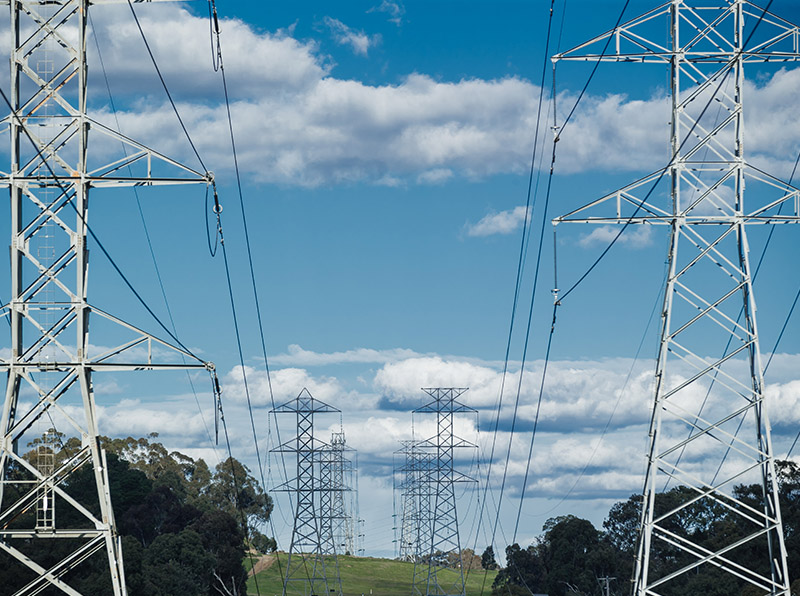

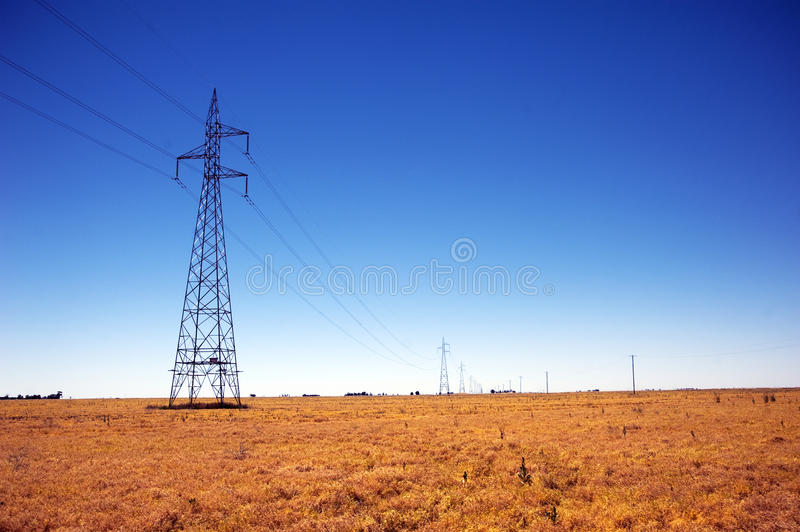

Solutions to solve what Shape_length was

Name                                           North West Bend to Robertstown
descriptio                                                               None
tessellate                                                                  1
visibility                                                                  1
COMMENT                                                                  None
FEATURETYP                                                  Transmission Line
SHAPE_Leng                                                           0.645031
NAME2                                          North West Bend to Robertstown
OBJECTID                                                                  231
SPATIALCON                                                                  3
REVISED                                                              20120710
DESCRIPTON                  A network of wires and insulators used to conn...
CAPACITYKV                                                      

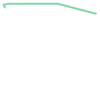

In [59]:
a = transmissionlines_visual.iloc[145]
#Test 145 too!
print(a)
a.geometry

In [30]:
def Mapandtline():
    fig , ax = plt.subplots(1,1)
    ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
    ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
    ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
    f = transmissionlines_data.groupby("SHAPE_Length").OBJECTID.min()
    g = transmissionlines_data["NAME"].iloc[int(f.iloc[-1] - 1)]
    h = transmissionlines_visual["Name"].astype(str) == str(g)
    transmissionlines_visual[h].plot(ax=ax)
    print(g)

Basslink-Loy Yang to Basslink-George Town


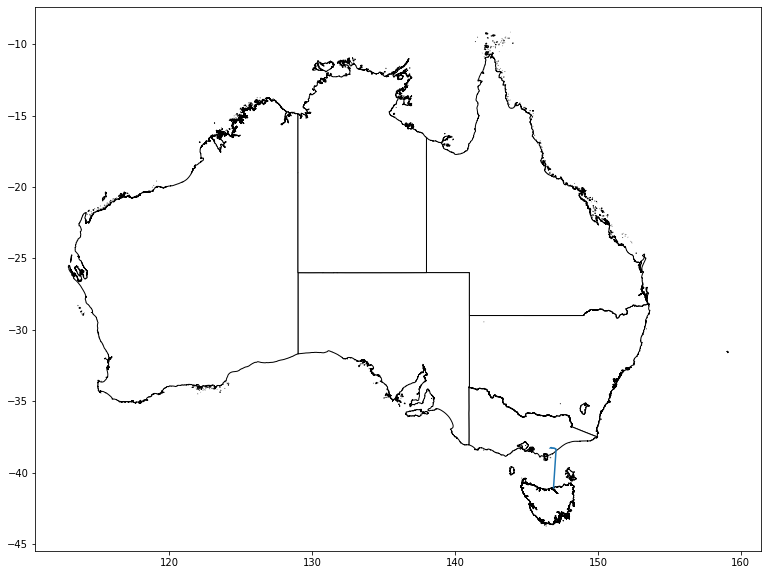

In [32]:
Mapandtline()

In [33]:
def Mapandtline2():
    fig , ax = plt.subplots(1,1)
    ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
    ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
    ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
    f = transmissionlines_data.groupby("SHAPE_Length").OBJECTID.min()
    g = transmissionlines_data["NAME"].iloc[int(f.iloc[0] - 1)]
    h = transmissionlines_visual["Name"].astype(str) == str(g)
    transmissionlines_visual[h].plot(ax=ax)
    print(g)

Tumut 2 Power Station to Tumut 2 Substation


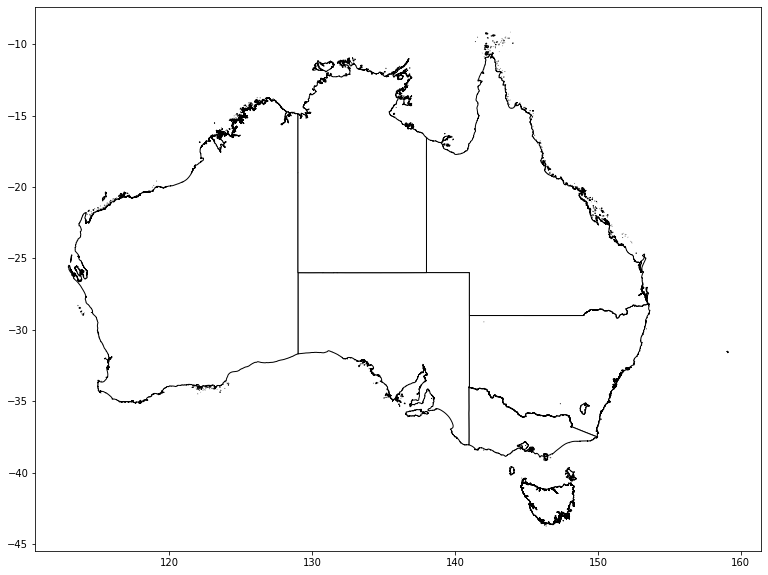

In [35]:
Mapandtline2()

In [39]:
def tinytline():
    f = transmissionlines_data.groupby("SHAPE_Length").OBJECTID.min()
    g = transmissionlines_data["NAME"].iloc[int(f.iloc[0] - 1)]
    h = transmissionlines_visual["Name"].astype(str) == str(g)
    transmissionlines_visual[h].plot()
    print(g)

Tumut 2 Power Station to Tumut 2 Substation


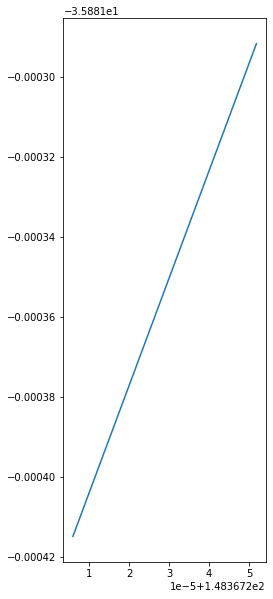

In [41]:
tinytline()

<AxesSubplot:>

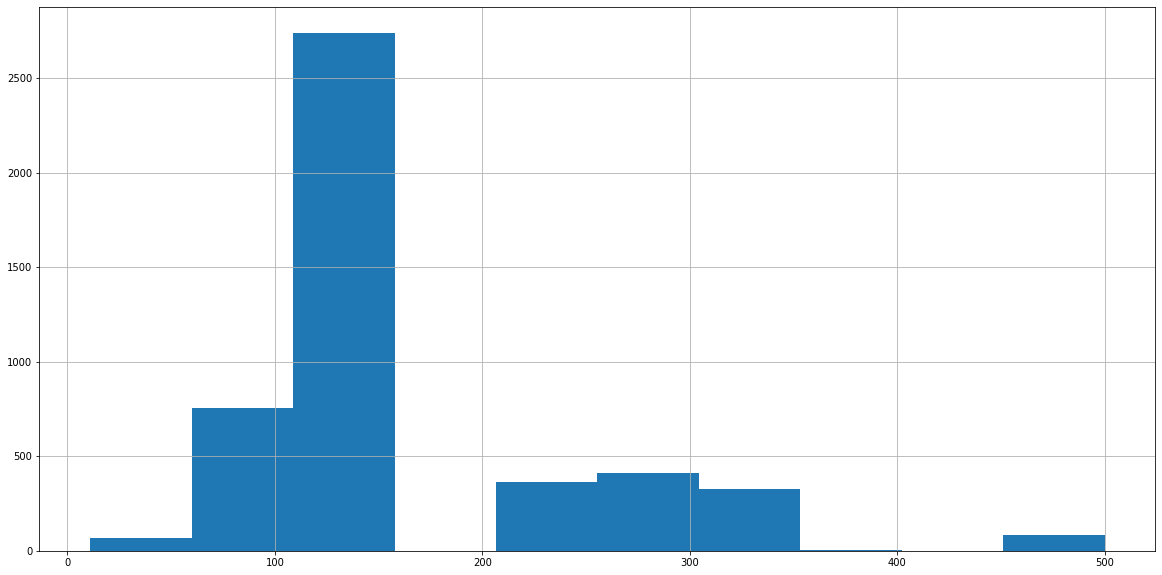

In [13]:
transmissionlines_data.CAPACITYKV[transmissionlines_data.CAPACITYKV < 600].hist()

In [14]:
transmissionlines_data["CAPACITYKV"].min()

11

In [43]:
def avgcapandtline():
    f1 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
    f2 = transmissionlines_data.groupby("STATE").CAPACITYKV.min()
    f3 = transmissionlines_data.groupby("STATE").CAPACITYKV.max()
    f4 = transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts() 
    ax = f1.plot(kind='bar',alpha=1,color='royalblue')
    f2.plot(ax=ax,color='brown')
    f3.plot(ax=ax,color='red')
    f4.plot(ax=ax,kind='bar',color='orange', alpha=0.4)
    plt.xlabel("State")

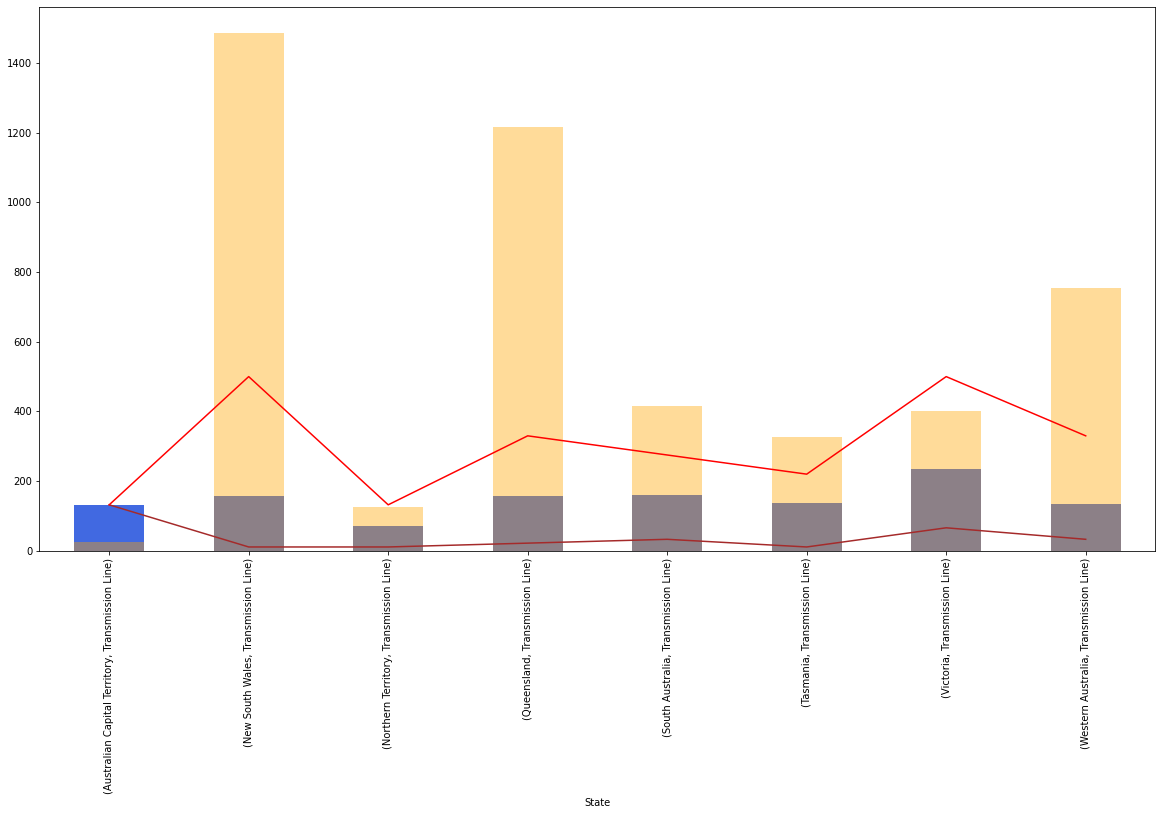

In [44]:
avgcapandtline()

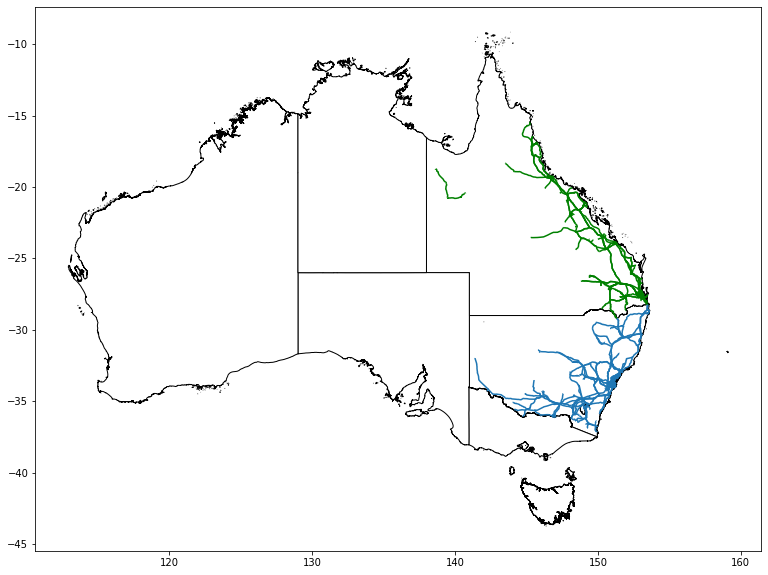

In [16]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
test1 = transmissionlines_visual["STATE"].astype(str) == "Queensland"
test2 = transmissionlines_visual["STATE"].astype(str) == "New South Wales"
transmissionlines_visual[test1].geometry.plot(ax=ax, color='green')
transmissionlines_visual[test2].geometry.plot(ax=ax)
a = transmissionlines_visual.iloc[0]

In [49]:
def overandunder():
    fig , ax = plt.subplots(1,1)
    ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
    ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
    ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
    test1 = transmissionlines_visual["CLASS"].astype(str) == "Overhead"
    test2 = transmissionlines_visual["CLASS"].astype(str) == "Underground"
    transmissionlines_visual[test1].geometry.plot(ax=ax,alpha=0.25)
    transmissionlines_visual[test2].geometry.plot(ax=ax,color='red')

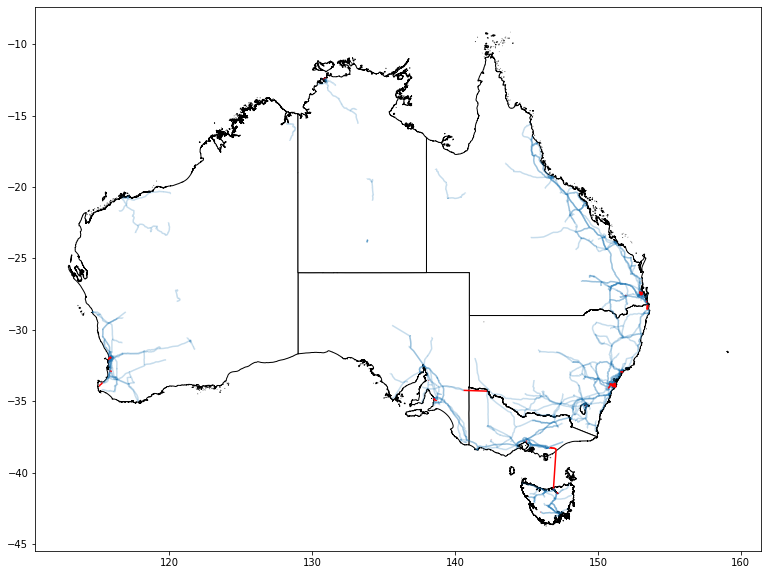

In [50]:
overandunder()

In [18]:
def add_centroid(row):
    return row.geometry.centroid

transmissionlines_visual["centroid"] = transmissionlines_visual.apply(add_centroid, axis=1)

transmissionlines_visual.sample(2)

C:\Users\ejx39\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid
657,Quarantine Power Station to Torrens North,None,1,1,None,Transmission Line,0.000570871107066396,Quarantine Power Station to Torrens North,1041,5,20120710,A network of wires and insulators used to conn...,66,South Australia,Operational,1047,Overhead,"LINESTRING (138.522 -34.780, 138.522 -34.779, ...",POINT (138.52209 -34.77938)
351,Sydney East to Willoughby,None,1,1,None,Transmission Line,0.0557963286088566,Sydney East to Willoughby,591,3,20120710,A network of wires and insulators used to conn...,132,New South Wales,Operational,594,Underground,"LINESTRING (151.194 -33.762, 151.185 -33.817)",POINT (151.18973 -33.78924)


POINT (150.62339098942996 -24.344950770484452)


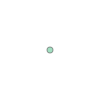

In [19]:
a = transmissionlines_visual.iloc[0]
print(a.centroid)
a.centroid

<AxesSubplot:>

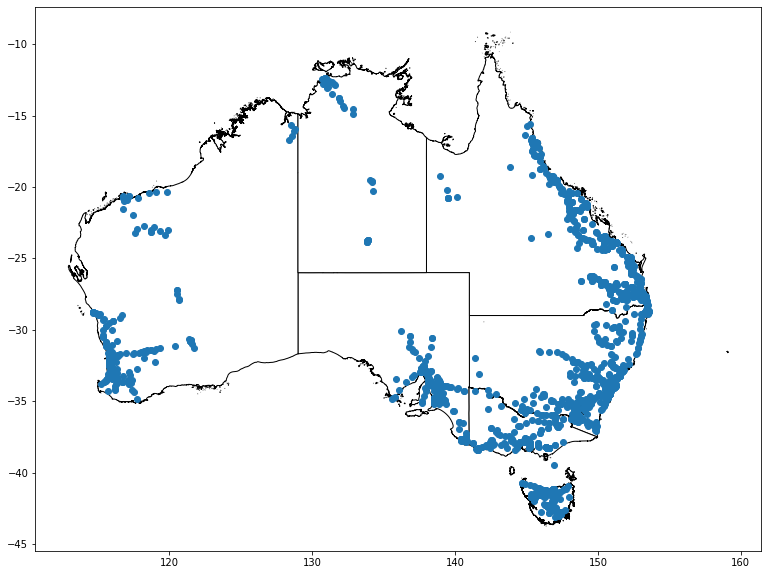

In [20]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
transmissionlines_visual.centroid.plot(ax=ax)

In [21]:
right_here = shapely.geometry.point.Point(147.0167, -32.16333)
transmissionlines_visual["distance_from_centre_NSW"] = transmissionlines_visual.centroid.distance(right_here)


Text(0.5, 1.0, 'Distribution of distances from center of NSW')

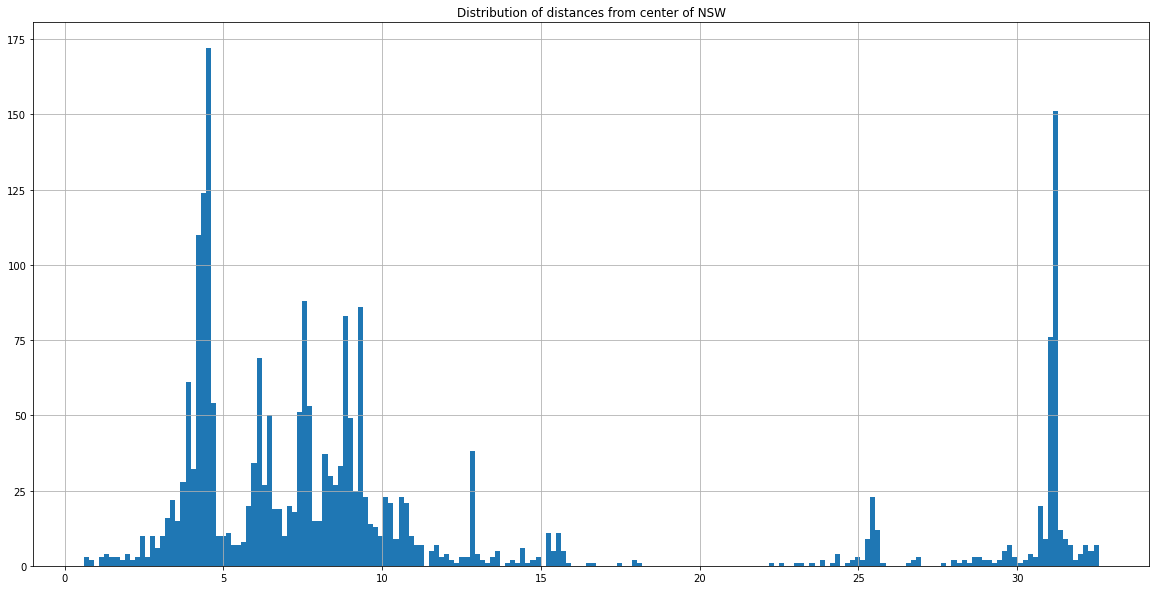

In [22]:
transmissionlines_visual.distance_from_centre_NSW.hist(bins=200)
plt.title("Distribution of distances from center of NSW")

In [23]:
close_transmissionlines_visual.geometry.convex_hull.plot();

NameError: name 'close_transmissionlines_visual' is not defined

In [ ]:
transmissionlines_visual.iloc[2]

In [45]:
transmissionlines_visual.groupby("STATE").distance_from_centre_NSW.max()

STATE
Australian Capital Territory     3.854092
New South Wales                  7.563291
Northern Territory              25.613057
Queensland                      16.690065
South Australia                 11.738602
Tasmania                        10.923243
Victoria                         8.319627
Western Australia               32.564821
Name: distance_from_centre_NSW, dtype: float64

In [53]:
def tlineandmeancap():
    transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
    tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
    tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
    ax = tline1.plot(kind='bar',color='aqua')
    plt.title("Length of Transmission Lines vs Mean Capacity per State")
    plt.xlabel("State")
    plt.ylabel("Capacity (in kiloVolts) and Shape_Length")
    tline2.plot(ax=ax, color='red',style='x')
    plt.show()

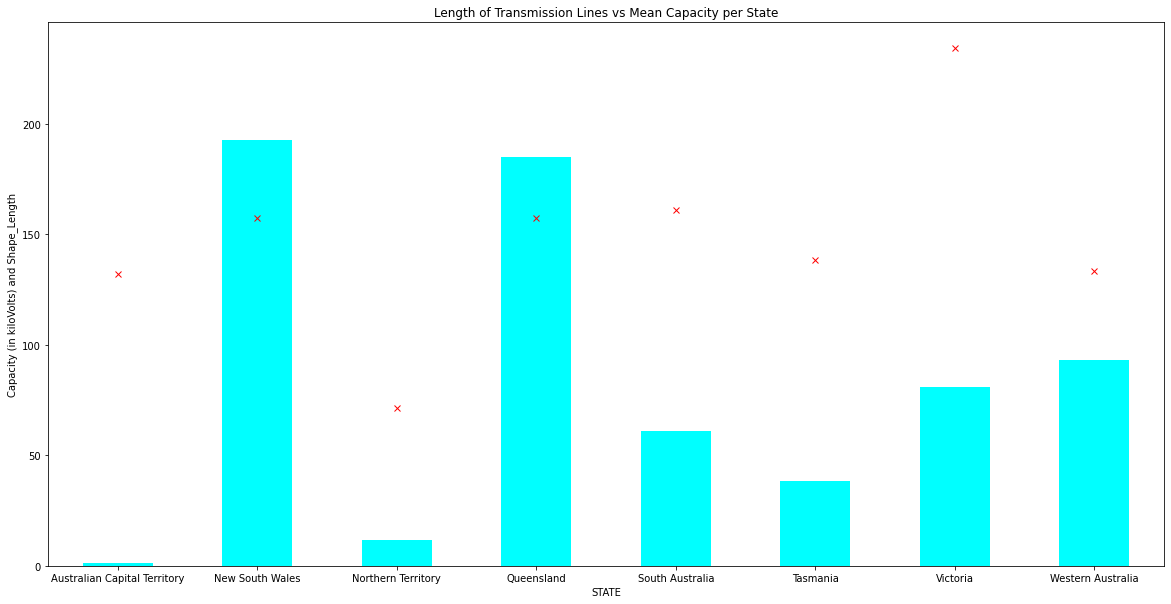

In [54]:
tlineandmeancap()

In [55]:
def tlineandtotcap():
    transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
    tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
    tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.sum() / 1000
    ax = tline1.plot(kind='bar',color='aqua')
    plt.title("Length of Transmission Lines vs Total Capacity per State")
    plt.xlabel("State")
    plt.ylabel("Capacity (in megaVolts) and Shape_Length")
    tline2.plot(ax=ax, color='red',style='x')
    plt.show()

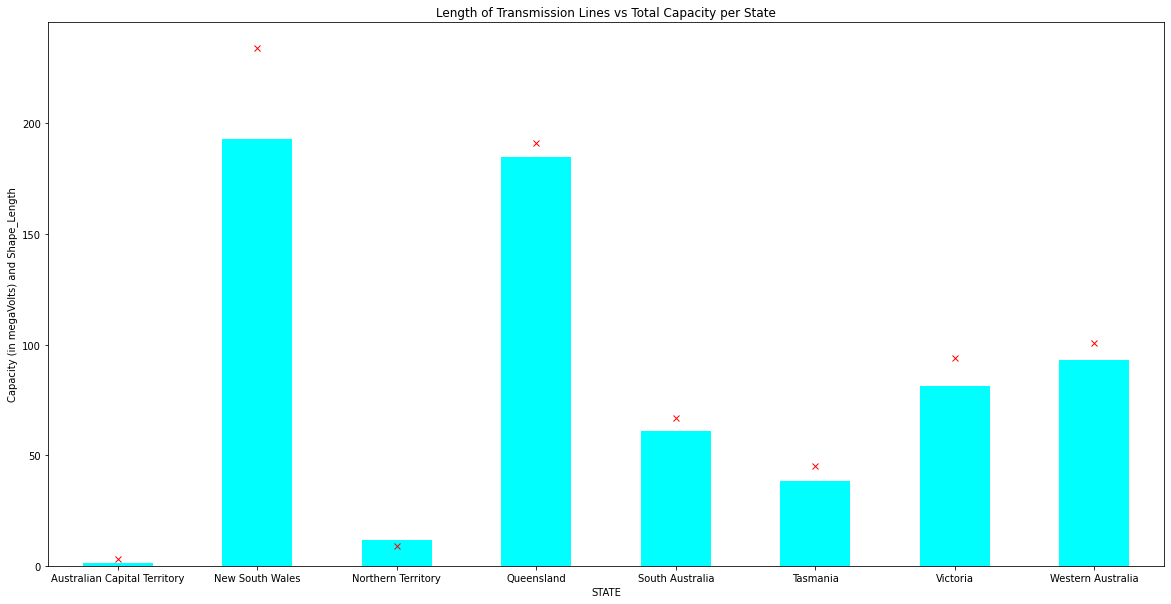

In [56]:
tlineandtotcap()

In [ ]:
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
tlines.iloc[0]
f4 = transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts() 
f4

CAPACITYKV vs TLINE LENGTH vs POPULATION DENSITY

| State |SHAPE_Length | Avg Capacity (kV) | People per sq km | No. Tlines | 
| --- | --- | --- | --- | --- |
| ACT | 1.118655 | 132 | 192.4 | 24 |
| NSW | 192.688 | 157.471 | 10.10 | 1486 |
| QLD | 184.6706 | 157.310 | 3.01 | 1216 |
| NT | 11.51927 | 71.238 | 0.18 | 126 | 
| SA | 61.143 | 160.875 | 1.83 | 416 | 
| TAS | 38.502 | 138.478 | 8.36 | 326 | 
| VIC | 81.055 | 234.119 | 28.79 | 402 | 
| WA | 93.199 | 133.400 | 1.09 | 754 | 


In [57]:
def coolmap():
    fig , ax = plt.subplots(1,1)
    ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
    ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
    ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
    close_transmissionlines_visual = transmissionlines_visual[transmissionlines_visual.distance_from_centre_NSW < 50]
    close_transmissionlines_visual.plot(ax=ax, column='distance_from_centre_NSW', cmap='cool',legend=True)
    popdensity.plot(ax=ax,color='red')

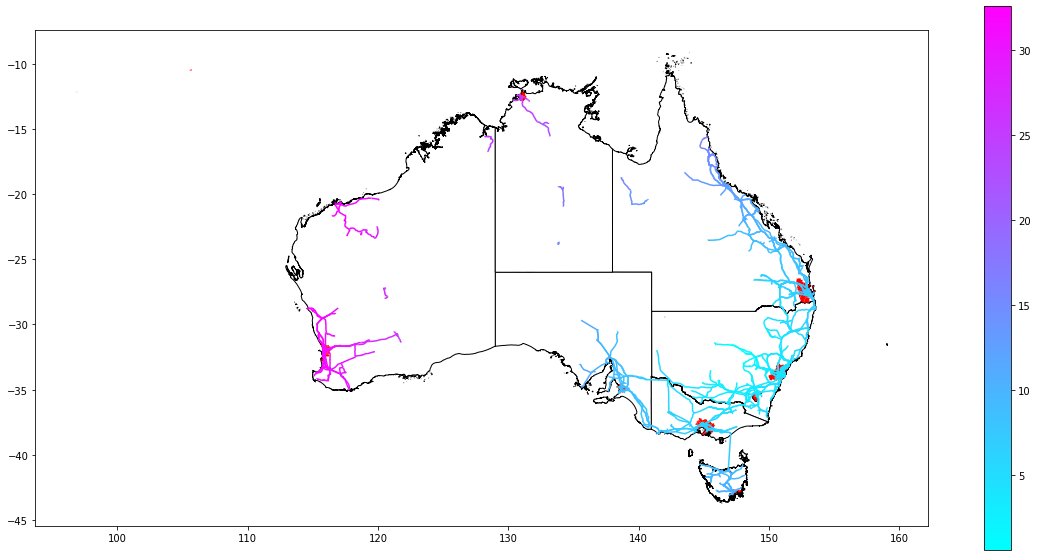

In [58]:
coolmap()